In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 1.0MB 5.7MB/s 
     |████████████████████████████████| 6.5MB 12.9MB/s 
     |████████████████████████████████| 14.8MB 267kB/s 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from matplotlib import pyplot
import geopandas

In [4]:
df= pd.read_csv('/content/drive/MyDrive/Dataset/covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
main_df =df.drop(['Sno','Time','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
main_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
9286,09/12/20,Telengana,266120,1480,275261
9287,09/12/20,Tripura,32169,373,32945
9288,09/12/20,Uttarakhand,72435,1307,79141
9289,09/12/20,Uttar Pradesh,528832,7967,558173
9290,09/12/20,West Bengal,475425,8820,507995


In [7]:
main_df['Active'] = main_df['Confirmed'] - main_df['Cured'] - main_df['Deaths']
main_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
9286,09/12/20,Telengana,266120,1480,275261,7661
9287,09/12/20,Tripura,32169,373,32945,403
9288,09/12/20,Uttarakhand,72435,1307,79141,5399
9289,09/12/20,Uttar Pradesh,528832,7967,558173,21374
9290,09/12/20,West Bengal,475425,8820,507995,23750


In [8]:
main_df['Date'] = pd.to_datetime(main_df['Date'])
main_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
9286,2020-09-12,Telengana,266120,1480,275261,7661
9287,2020-09-12,Tripura,32169,373,32945,403
9288,2020-09-12,Uttarakhand,72435,1307,79141,5399
9289,2020-09-12,Uttar Pradesh,528832,7967,558173,21374
9290,2020-09-12,West Bengal,475425,8820,507995,23750


In [9]:
indiacases = main_df[main_df['Date'] == main_df['Date'].max()].copy().fillna(0)
indiacases.index = indiacases["State/UnionTerritory"]
indiacases = indiacases.drop(['State/UnionTerritory', 'Date'], axis=1)
indiacases.head()

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Andaman and Nicobar Islands,4267,60,4494,167
Andhra Pradesh,820234,6828,847977,20915
Arunachal Pradesh,14126,46,15657,1485
Assam,203308,954,209633,5371
Bihar,216940,1162,223917,5815


In [10]:
indiacases.sort_values('Confirmed', ascending= False).style\
    .background_gradient(cmap='BrBG_r', subset=['Confirmed'])\
    .background_gradient(cmap='YlGn_r', subset=["Deaths"])\
    .background_gradient(cmap='YlOrBr',subset=['Cured'])\
    .background_gradient(cmap='BuPu', subset=['Active'])

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Maharashtra,1597255,45560,1731833,89018
Karnataka,811581,11453,853796,30762
Andhra Pradesh,820234,6828,847977,20915
Tamil Nadu,720339,11415,750409,18655
Uttar Pradesh,473316,7281,503159,22562
Kerala,422410,1771,502719,78538
Delhi,410118,7228,459975,42629
West Bengal,376696,7452,416984,32836
Odisha,292477,1469,305000,11054


**TOP 10 INDIAN STATES WITH HIGH DEATH RATE**

In [12]:
df1=indiacases.sort_values('Deaths', ascending=False)
df2= df1[:10]
df2.reset_index(inplace = True)
df2
df1.reset_index(inplace = True)

Text(0.5, 1.0, 'Top 10 Indian States with high death rate')

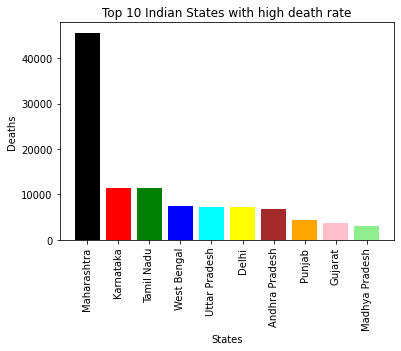

In [13]:
plt.bar(df2['State/UnionTerritory'], df2['Deaths'], color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'brown', 'orange','pink', 'lightgreen'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Deaths')
plt.title("Top 10 Indian States with high death rate")


In [14]:
new_df= indiacases.sort_values('Confirmed', ascending=False)
new_df1= new_df[:10]
new_df1.reset_index(inplace = True)
new_df1

,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,Maharashtra,1597255,45560,1731833,89018
1,Karnataka,811581,11453,853796,30762
2,Andhra Pradesh,820234,6828,847977,20915
3,Tamil Nadu,720339,11415,750409,18655
4,Uttar Pradesh,473316,7281,503159,22562
5,Kerala,422410,1771,502719,78538
6,Delhi,410118,7228,459975,42629
7,West Bengal,376696,7452,416984,32836
8,Odisha,292477,1469,305000,11054
9,Telengana,235950,1393,254666,17323


Text(0.5, 1.0, 'Top 10 Indian States with highest confirmed cases')

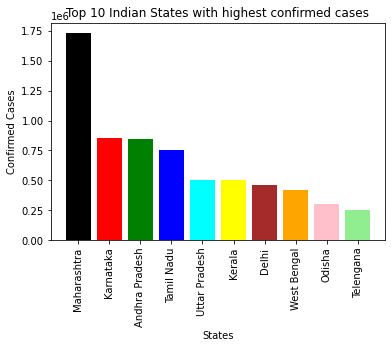

In [15]:
plt.bar(new_df1['State/UnionTerritory'], new_df1['Confirmed'], color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'brown', 'orange','pink', 'lightgreen'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Confirmed Cases')
plt.title("Top 10 Indian States with highest confirmed cases")


**BASEMAP INDIA**

In [17]:
import geopandas as gpd
from geopandas import GeoDataFrame

In [18]:
fp = '/content/drive/MyDrive/Dataset/Shape_file'
map_df = gpd.read_file(fp)

In [19]:
map_df.rename(columns = {'st_nm':'State/UnionTerritory'}, inplace = True)
map_df

,id,State/UnionTerritory,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."
5,None,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406..."
6,None,Dadra and Nagar Haveli,"POLYGON ((73.20640 20.12165, 73.20865 20.10695..."
7,None,Daman and Diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463..."
8,None,Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698..."
9,None,Gujarat,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23..."


In [20]:
df_merged = pd.merge(df1, map_df, on='State/UnionTerritory')
merged = GeoDataFrame(df_merged)
merged.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Active,id,geometry
0,Maharashtra,1597255,45560,1731833,89018,None,"POLYGON ((80.66449 21.33184, 80.64649 21.25411..."
1,Karnataka,811581,11453,853796,30762,None,"POLYGON ((77.55301 18.29376, 77.65650 17.97231..."
2,Tamil Nadu,720339,11415,750409,18655,None,"MULTIPOLYGON (((79.78256 11.89825, 79.79156 11..."
3,West Bengal,376696,7452,416984,32836,None,"MULTIPOLYGON (((88.22156 21.76255, 88.31155 21..."
4,Uttar Pradesh,473316,7281,503159,22562,None,"POLYGON ((80.07054 28.82830, 80.37201 28.63290..."


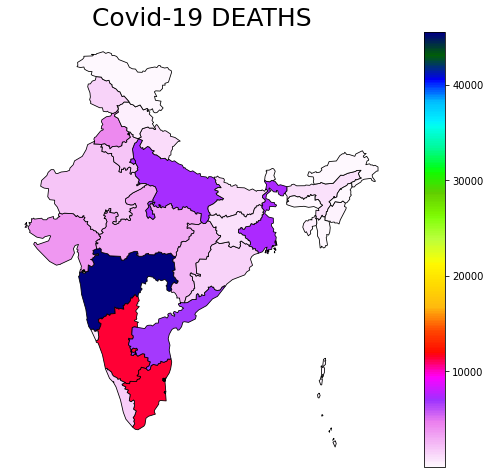

In [21]:
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.axis('off')
ax.set_title('Covid-19 DEATHS', fontdict={'fontsize': '25', 'fontweight' : '10'})
merged.plot(column='Deaths',cmap= 'gist_ncar_r', linewidth=0.8, ax=ax, edgecolor='0', legend=True)

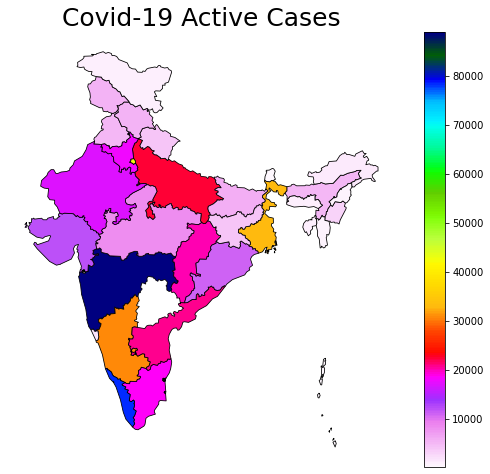

In [22]:
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.axis('off')
ax.set_title('Covid-19 Active Cases', fontdict={'fontsize': '25', 'fontweight' : '10'})
merged.plot(column='Active',cmap= 'gist_ncar_r', linewidth=0.8, ax=ax, edgecolor='0', legend=True)